지금까지 그랬듯이 이 예제의 코드도 tf.keras API를 사용합니다. 텐서플로 케라스 가이드에서 tf.keras API에 대해 더 많은 정보를 얻을 수 있습니다.

앞서 영화 리뷰 분류와 주택 가격 예측의 두 예제에서 일정 에포크 동안 훈련하면 검증 세트에서 모델 성능이 최고점에 도달한 다음 감소하기 시작한 것을 보았습니다.

다른 말로 하면, 모델이 훈련 세트에 과대적합(overfitting)된 것입니다. 과대적합을 다루는 방법은 꼭 배워야 합니다. 훈련 세트에서 높은 성능을 얻을 수 있지만 진짜 원하는 것은 테스트 세트(또는 이전에 본 적 없는 데이터)에 잘 일반화되는 모델입니다.

과대적합의 반대는 과소적합(underfitting)입니다. 과소적합은 테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어납니다. 발생하는 원인은 여러가지입니다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우입니다. 즉 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻입니다.

모델을 너무 오래 훈련하면 과대적합되기 시작하고 테스트 세트에서 일반화되지 못하는 패턴을 훈련 세트에서 학습합니다. 과대적합과 과소적합 사이에서 균형을 잡아야 합니다. 이를 위해 적절한 에포크 횟수동안 모델을 훈련하는 방법을 배워보겠습니다.

과대적합을 막는 가장 좋은 방법은 더 많은 훈련 데이터를 사용하는 것입니다. 많은 데이터에서 훈련한 모델은 자연적으로 일반화 성능이 더 좋습니다. 데이터를 더 준비할 수 없을 때 그다음으로 가장 좋은 방법은 규제(regularization)와 같은 기법을 사용하는 것입니다. 모델이 저장할 수 있는 정보의 양과 종류에 제약을 부과하는 방법입니다. 네트워크가 소수의 패턴만 기억할 수 있다면 최적화 과정 동안 일반화 가능성이 높은 가장 중요한 패턴에 촛점을 맞출 것입니다.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [3]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [6]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [7]:
train_data.shape

(25000, 10000)

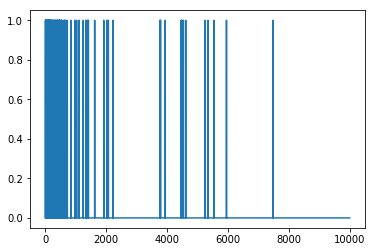

In [8]:
plt.plot(train_data[0])

## 과적합(overfitting) 예제
### 기준 모델

In [17]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
baseline_history = baseline_model.fit(train_data,
                  train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4914 - accuracy: 0.8031 - binary_crossentropy: 0.4914 - val_loss: 0.3400 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.3400
Epoch 2/20
25000/25000 - 2s - loss: 0.2522 - accuracy: 0.9093 - binary_crossentropy: 0.2522 - val_loss: 0.2837 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2837
Epoch 3/20
25000/25000 - 2s - loss: 0.1842 - accuracy: 0.9355 - binary_crossentropy: 0.1842 - val_loss: 0.2886 - val_accuracy: 0.8861 - val_binary_crossentropy: 0.2886
Epoch 4/20
25000/25000 - 2s - loss: 0.1477 - accuracy: 0.9488 - binary_crossentropy: 0.1477 - val_loss: 0.3104 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.3104
Epoch 5/20
25000/25000 - 2s - loss: 0.1214 - accuracy: 0.9595 - binary_crossentropy: 0.1214 - val_loss: 0.3367 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3367
Epoch 6/20
25000/25000 - 2s - loss: 0.1034 - accuracy: 0.9664 - binary_crossentropy: 0.1034 - val_loss: 0.3700

### 작은 모델 만들기
앞서 만든 기준 모델(neuron 16개)와 비교하기 위해 적은 수의 은닉 유닛을 가진 모델 생성

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6062 - accuracy: 0.7297 - binary_crossentropy: 0.6062 - val_loss: 0.5051 - val_accuracy: 0.8428 - val_binary_crossentropy: 0.5051
Epoch 2/20
25000/25000 - 2s - loss: 0.4041 - accuracy: 0.8840 - binary_crossentropy: 0.4041 - val_loss: 0.3725 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.3725
Epoch 3/20
25000/25000 - 2s - loss: 0.2909 - accuracy: 0.9088 - binary_crossentropy: 0.2909 - val_loss: 0.3135 - val_accuracy: 0.8842 - val_binary_crossentropy: 0.3135
Epoch 4/20
25000/25000 - 2s - loss: 0.2332 - accuracy: 0.9232 - binary_crossentropy: 0.2332 - val_loss: 0.2907 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2907
Epoch 5/20
25000/25000 - 2s - loss: 0.1975 - accuracy: 0.9358 - binary_crossentropy: 0.1975 - val_loss: 0.2840 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2840
Epoch 6/20
25000/25000 - 2s - loss: 0.1724 - accuracy: 0.9442 - binary_crossentropy: 0.1724 - val_loss: 0.2863

### 큰 모델 만들기

In [14]:
bigger_input = keras.Input(shape=(NUM_WORDS))
x = keras.layers.Dense(512, activation='relu')(bigger_input)
x = keras.layers.Dense(512, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)

bigger_model = keras.Model(bigger_input, output)

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.3463 - accuracy: 0.8540 - binary_crossentropy: 0.3463 - val_loss: 0.2897 - val_accuracy: 0.8821 - val_binary_crossentropy: 0.2897
Epoch 2/20
25000/25000 - 2s - loss: 0.1426 - accuracy: 0.9481 - binary_crossentropy: 0.1426 - val_loss: 0.3374 - val_accuracy: 0.8745 - val_binary_crossentropy: 0.3374
Epoch 3/20
25000/25000 - 2s - loss: 0.0511 - accuracy: 0.9855 - binary_crossentropy: 0.0511 - val_loss: 0.4447 - val_accuracy: 0.8682 - val_binary_crossentropy: 0.4447
Epoch 4/20
25000/25000 - 2s - loss: 0.0080 - accuracy: 0.9986 - binary_crossentropy: 0.0080 - val_loss: 0.5548 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.5548
Epoch 5/20
25000/25000 - 2s - loss: 0.0014 - accuracy: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.6525 - val_accuracy: 0.8703 - val_binary_crossentropy: 0.6525
Epoch 6/20
25000/25000 - 2s - loss: 2.9775e-04 - accuracy: 1.0000 - binary_crossentropy: 2.9775e-04 - val_loss

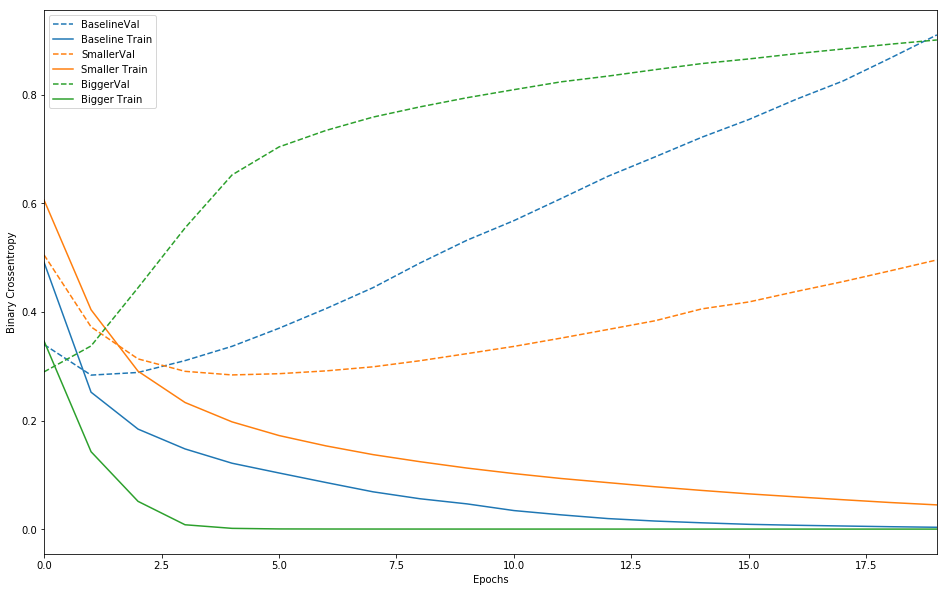

In [22]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+ 'Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## 과적합 방지

## 가중치 규제
아마도 오캄의 면도날(Occam's Razor) 이론을 들어 보았을 것입니다. 어떤 것을 설명하는 두 가지 방법이 있다면 더 정확한 설명은 최소한의 가정이 필요한 가장 "간단한" 설명일 것입니다. 이는 신경망으로 학습되는 모델에도 적용됩니다. 훈련 데이터와 네트워크 구조가 주어졌을 때 이 데이터를 설명할 수 있는 가중치의 조합(즉, 가능한 모델)은 많습니다. 간단한 모델은 복잡한 것보다 과대적합되는 경향이 작을 것입니다.

여기서 "간단한 모델"은 모델 파라미터의 분포를 봤을 때 엔트로피(entropy)가 작은 모델입니다(또는 앞 절에서 보았듯이 적은 파라미터를 가진 모델입니다). 따라서 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것입니다. 이는 가중치 값의 분포를 좀 더 균일하게 만들어 줍니다. 이를 "가중치 규제"(weight regularization)라고 부릅니다. 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가합니다. 이 비용은 두 가지 형태가 있습니다:

* `L1 규제` : 가중치의 절대값에 비례하는 비용 추가(가중치의 "L1 norm 추가")
* `L2 규제` : 가중치의 제곱에 비례하는 비용 추가(가중치의 "L2 norm 제곱 추가")

`L1 regularization`은 일부 가중치를 0으로 만든다. `L2 regularization`은 가중치를 제한하지만 완전이 0으로 만들지 않음. 그래서 `L2 regularization`을 더 많이 사용한다.

In [23]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5838 - accuracy: 0.7698 - binary_crossentropy: 0.5458 - val_loss: 0.4359 - val_accuracy: 0.8669 - val_binary_crossentropy: 0.3945
Epoch 2/20
25000/25000 - 2s - loss: 0.3469 - accuracy: 0.8978 - binary_crossentropy: 0.2973 - val_loss: 0.3493 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2940
Epoch 3/20
25000/25000 - 2s - loss: 0.2841 - accuracy: 0.9186 - binary_crossentropy: 0.2255 - val_loss: 0.3424 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2818
Epoch 4/20
25000/25000 - 2s - loss: 0.2571 - accuracy: 0.9317 - binary_crossentropy: 0.1950 - val_loss: 0.3481 - val_accuracy: 0.8841 - val_binary_crossentropy: 0.2851
Epoch 5/20
25000/25000 - 2s - loss: 0.2422 - accuracy: 0.9374 - binary_crossentropy: 0.1779 - val_loss: 0.3605 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.2958
Epoch 6/20
25000/25000 - 2s - loss: 0.2297 - accuracy: 0.9432 - binary_crossentropy: 0.1643 - val_loss: 0.3675

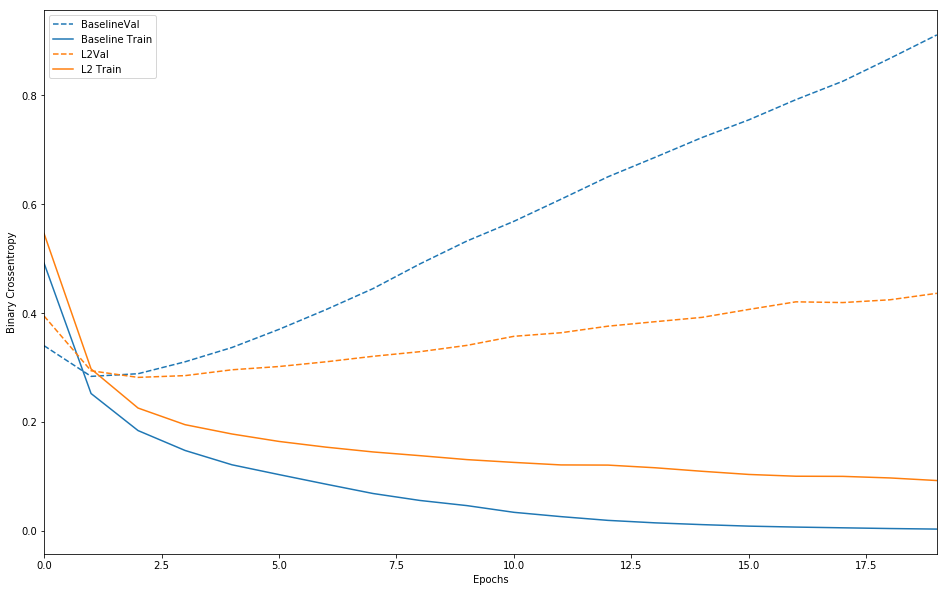

In [24]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### 드롭아웃 추가

드롭아웃(dropout)은 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나입니다. 토론토(Toronto) 대학의 힌튼(Hinton)과 그의 제자들이 개발했습니다. 드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끕니다(즉, 0으로 만듭니다). 훈련하는 동안 어떤 입력 샘플에 대해 [0.2, 0.5, 1.3, 0.8, 1.1] 벡터를 출력하는 층이 있다고 가정해 보죠. 드롭아웃을 적용하면 이 벡터에서 몇 개의 원소가 랜덤하게 0이 됩니다. 예를 들면, [0, 0.5, 1.3, 0, 1.1]가 됩니다. "드롭아웃 비율"은 0이 되는 특성의 비율입니다. 보통 0.2에서 0.5 사이를 사용합니다. 테스트 단계에서는 어떤 유닛도 드롭아웃하지 않습니다. 훈련 단계보다 더 많은 유닛이 활성화되기 때문에 균형을 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄입니다.

`tf.keras`에서는 `Dropout` 층을 이용해 네트워크에 드롭아웃을 추가할 수 있습니다. 이 층은 바로 이전 층의 출력에 드롭아웃을 적용합니다.

IMDB 네트워크에 두 개의 `Dropout` 층을 추가하여 과대적합이 얼마나 감소하는지 알아 보겠습니다:

In [25]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6420 - accuracy: 0.6221 - binary_crossentropy: 0.6420 - val_loss: 0.5179 - val_accuracy: 0.8497 - val_binary_crossentropy: 0.5179
Epoch 2/20
25000/25000 - 2s - loss: 0.4763 - accuracy: 0.7945 - binary_crossentropy: 0.4763 - val_loss: 0.3508 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.3508
Epoch 3/20
25000/25000 - 2s - loss: 0.3550 - accuracy: 0.8685 - binary_crossentropy: 0.3550 - val_loss: 0.2865 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2865
Epoch 4/20
25000/25000 - 2s - loss: 0.2848 - accuracy: 0.8995 - binary_crossentropy: 0.2848 - val_loss: 0.2760 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2760
Epoch 5/20
25000/25000 - 2s - loss: 0.2406 - accuracy: 0.9177 - binary_crossentropy: 0.2406 - val_loss: 0.2750 - val_accuracy: 0.8889 - val_binary_crossentropy: 0.2750
Epoch 6/20
25000/25000 - 2s - loss: 0.2063 - accuracy: 0.9321 - binary_crossentropy: 0.2063 - val_loss: 0.2969

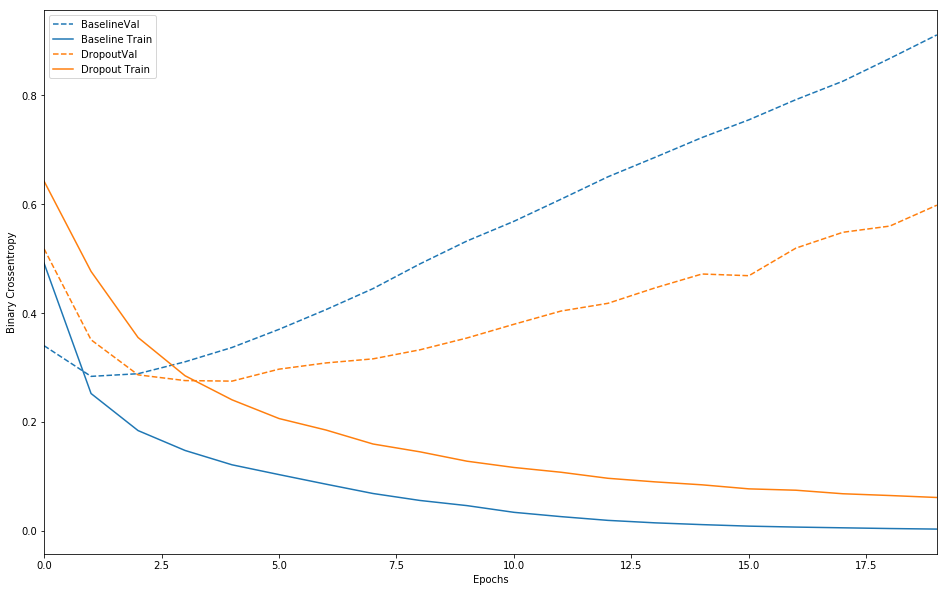

In [26]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [29]:
batch_normal_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

batch_normal_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

batch_normal_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.0434 - accuracy: 0.9804 - binary_crossentropy: 0.0434 - val_loss: 0.8400 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.8400
Epoch 2/20
25000/25000 - 2s - loss: 0.0445 - accuracy: 0.9804 - binary_crossentropy: 0.0445 - val_loss: 0.8691 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.8691
Epoch 3/20
25000/25000 - 2s - loss: 0.0427 - accuracy: 0.9802 - binary_crossentropy: 0.0427 - val_loss: 0.9158 - val_accuracy: 0.8718 - val_binary_crossentropy: 0.9158
Epoch 4/20
25000/25000 - 2s - loss: 0.0443 - accuracy: 0.9798 - binary_crossentropy: 0.0443 - val_loss: 0.9164 - val_accuracy: 0.8713 - val_binary_crossentropy: 0.9164
Epoch 5/20
25000/25000 - 2s - loss: 0.0440 - accuracy: 0.9804 - binary_crossentropy: 0.0440 - val_loss: 0.9315 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.9315
Epoch 6/20
25000/25000 - 2s - loss: 0.0403 - accuracy: 0.9812 - binary_crossentropy: 0.0403 - val_loss: 0.9530

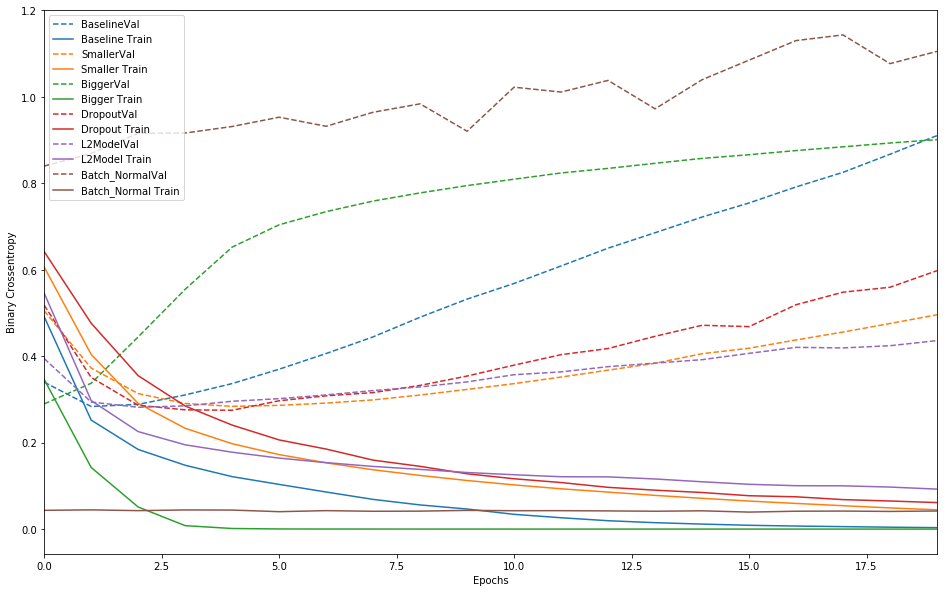

In [30]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history),
            ('dropout', dpt_model_history),
              ('l2model', l2_model_history),
              ('batch_normal', batch_normal_history)])

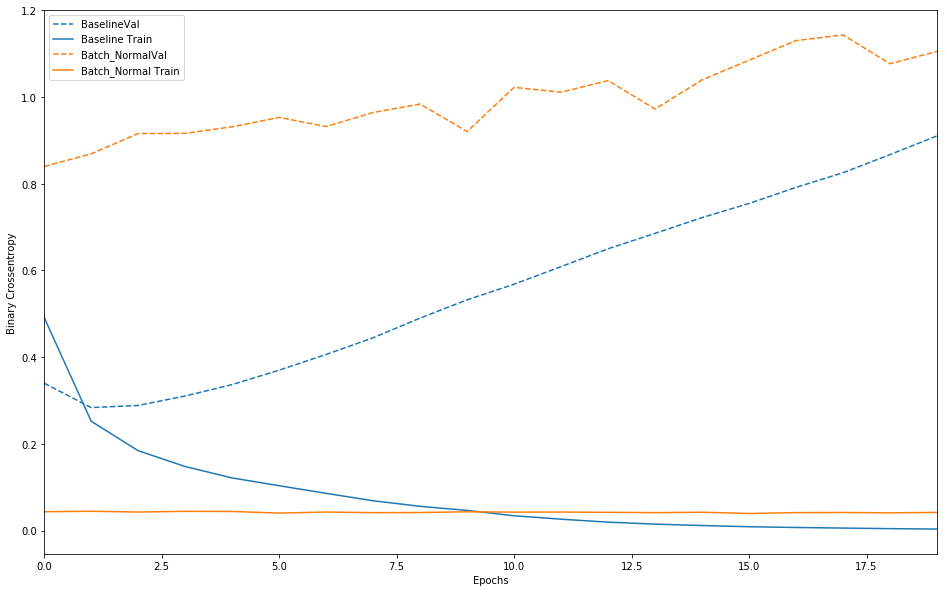

In [31]:
plot_history([('baseline', baseline_history),
              ('batch_normal', batch_normal_history)])